**Load the torchvision.datasets.MNIST() train and test datasets.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.cuda as cuda
import torch.nn as nn

In [2]:
from torchvision.datasets import MNIST

**Visualize at least 5 different samples of the MNIST training dataset.**

In [3]:
from torchvision.transforms import ToTensor
train_data = MNIST(root = 'data', train = True, download = True, transform = ToTensor(), target_transform = None)

In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

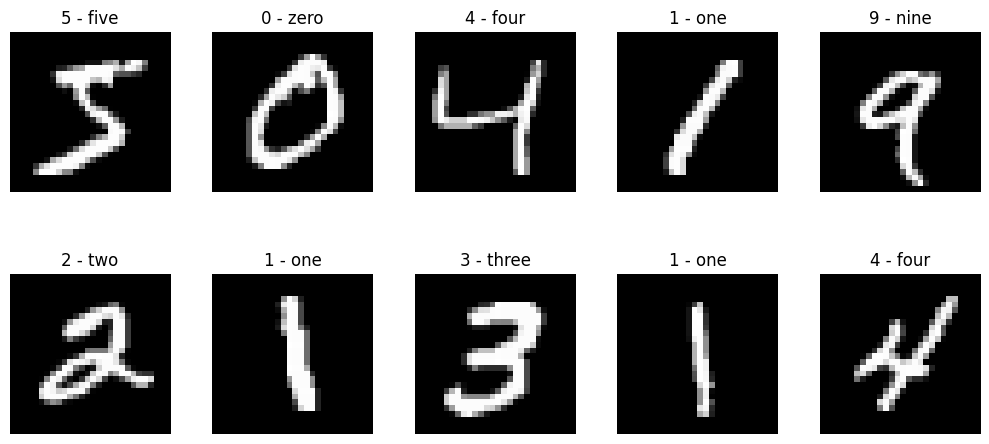

In [6]:
plt.figure(figsize = (10, 7))
for i in range (10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_data[i][0].reshape(28, 28, 1), cmap = 'gray')
    plt.title(train_data.classes[train_data[i][1]])
    plt.tight_layout()
    plt.axis(False)

**Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.**

In [7]:
test_data = MNIST(root = 'data', train = False, download = True, transform = ToTensor(), target_transform = None)

In [8]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data, batch_size = 32, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size = 32, shuffle = False)

**Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.**

In [9]:
class CNNExplainerModel(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1), nn.ReLU())
        self.conv_layer_2 = nn.Sequential(nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1), nn.ReLU(), nn.MaxPool2d(kernel_size = 2, stride = 1))
        self.conv_layer_3 = nn.Sequential(nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1), nn.ReLU())
        self.conv_layer_4 = nn.Sequential(nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1), nn.ReLU(), nn.MaxPool2d(kernel_size = 2, stride = 1))
        self.classifier_layer = nn.Sequential(nn.Flatten(), nn.Linear(in_features = hidden_units * 26 * 26, out_features = output_shape))
    def forward(self, x):
        fp = self.conv_layer_1(x)
        #print(f'Shape: {fp.shape}')
        fp = self.conv_layer_2(fp)
        #print(f'Shape: {fp.shape}')
        fp = self.conv_layer_3(fp)
        #print(f'Shape: {fp.shape}')
        fp = self.conv_layer_4(fp)
        #print(f'Shape: {fp.shape}')
        fp = self.classifier_layer(fp)
        return fp
        

In [10]:
device = 'cuda' if cuda.is_available() else 'cpu'

In [11]:
torch.cuda.device_count()

1

In [12]:
torch.cuda.is_available()

True

In [13]:
model_1 = CNNExplainerModel(input_shape = 1, output_shape = len(train_data.classes), hidden_units = 10).to(device)

In [14]:
model_1

CNNExplainerModel(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv_layer_4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6760, out_features=10, bias=True)
  )
)

In [15]:
model_1.state_dict()

OrderedDict([('conv_layer_1.0.weight',
              tensor([[[[ 0.2315,  0.2091, -0.1789],
                        [ 0.2186, -0.1045,  0.2677],
                        [-0.3221, -0.0812, -0.2946]]],
              
              
                      [[[ 0.2962,  0.1632, -0.2112],
                        [ 0.0200,  0.0911, -0.0877],
                        [-0.2198, -0.3125, -0.0741]]],
              
              
                      [[[ 0.1614, -0.3211,  0.1228],
                        [-0.2979,  0.3120,  0.1044],
                        [-0.0150, -0.0205, -0.0111]]],
              
              
                      [[[ 0.0743, -0.0830, -0.1203],
                        [ 0.0102,  0.1469,  0.2655],
                        [ 0.1825,  0.0662,  0.1330]]],
              
              
                      [[[-0.0234,  0.2597, -0.1563],
                        [ 0.0722, -0.1216, -0.0875],
                        [-0.0498, -0.3215, -0.2745]]],
              
              
      

**Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.**

**Checking the model performance on GPU**

In [16]:
#Getting the shape of the last classifier layer right
random_tensor = torch.rand(1, 28, 28)

In [17]:
model_1(random_tensor.unsqueeze(dim = 0).to(device))

tensor([[-0.0087, -0.0065, -0.0269, -0.0252, -0.0073,  0.0060, -0.0013,  0.0878,
         -0.0141, -0.0024]], device='cuda:0', grad_fn=<AddmmBackward0>)

**Note: The image has to be unsqueezed since batch_size is required apart from the 3 dims**

In [18]:
random_tensor.shape

torch.Size([1, 28, 28])

**Training and test loop**

In [19]:
opt_fn_1 = torch.optim.Adam(params = model_1.parameters(), lr = 0.001)
loss_fn_1 = nn.CrossEntropyLoss()

In [20]:
from helper_functions import accuracy_fn

In [21]:
def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               opt: torch.optim.Optimizer, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    train_acc, train_loss = 0, 0
    #Train mode
    model.train()
    #Iteration
    for batch, (X, y) in enumerate(data_loader):
        #Forward Pass
        X, y = X.to(device), y.to(device)
        train_logits = model(X).squeeze()
        train_pred_probs = torch.softmax(train_logits, dim = 0)
        train_preds = train_pred_probs.argmax(dim = 1)
        #Loss
        loss = loss_fn(train_logits, y)
        train_loss += loss
        #Accuracy
        train_acc += accuracy_fn(y, train_preds)
        #Resetting optimizer
        opt.zero_grad()
        #Backpropagation
        loss.backward()
        #Stepping the optimizer
        opt.step()
    train_acc /= len(data_loader)
    train_loss /= len(data_loader)
    print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} % ')

In [22]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_acc, test_loss = 0, 0
    #Evaluation mode
    model.eval()
    #Inference mode
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            #Forward Pass
            test_logits = model(X).squeeze()
            test_pred_probs = torch.softmax(test_logits, dim = 0)
            test_preds = test_pred_probs.argmax(dim = 1)
            #Loss
            test_loss += loss_fn(test_logits, y)
            #Accuracy
            test_acc += accuracy_fn(y, test_preds)
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    print(f'Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f} % ')

In [23]:
from timeit import default_timer as timer
epochs = 10
start = timer()
for epoch in range(epochs):
    print(f'----------Epoch : {epoch + 1}----------')
    train_step(model_1, train_dataloader, opt_fn_1, loss_fn_1, accuracy_fn, device)
    test_step(model_1, test_dataloader, loss_fn_1, accuracy_fn, device)
end = timer()
print(f'Total Time: {end - start} s on {device}')

----------Epoch : 1----------
Train Loss: 0.1726 | Train Acc: 87.4467 % 
Test Loss: 0.0625 | Test Acc: 92.7316 % 
----------Epoch : 2----------
Train Loss: 0.0615 | Train Acc: 91.1400 % 
Test Loss: 0.0490 | Test Acc: 93.6302 % 
----------Epoch : 3----------
Train Loss: 0.0454 | Train Acc: 91.8150 % 
Test Loss: 0.0412 | Test Acc: 94.7185 % 
----------Epoch : 4----------
Train Loss: 0.0361 | Train Acc: 92.2767 % 
Test Loss: 0.0440 | Test Acc: 94.1494 % 
----------Epoch : 5----------
Train Loss: 0.0299 | Train Acc: 92.2133 % 
Test Loss: 0.0536 | Test Acc: 93.9297 % 
----------Epoch : 6----------
Train Loss: 0.0252 | Train Acc: 92.5250 % 
Test Loss: 0.0414 | Test Acc: 94.3291 % 
----------Epoch : 7----------
Train Loss: 0.0224 | Train Acc: 92.4250 % 
Test Loss: 0.0507 | Test Acc: 94.1993 % 
----------Epoch : 8----------
Train Loss: 0.0193 | Train Acc: 92.5517 % 
Test Loss: 0.0469 | Test Acc: 94.0395 % 
----------Epoch : 9----------
Train Loss: 0.0163 | Train Acc: 92.5267 % 
Test Loss: 0.04

In [24]:
model_1_cpu = CNNExplainerModel(input_shape = 1, output_shape = len(train_data.classes), hidden_units = 10).to('cpu')

In [25]:
model_1_cpu.state_dict()

OrderedDict([('conv_layer_1.0.weight',
              tensor([[[[ 4.3795e-02, -1.8746e-01, -2.1609e-01],
                        [-9.5054e-02,  2.1268e-01,  2.9239e-01],
                        [-1.6222e-01,  1.8717e-01,  1.2566e-01]]],
              
              
                      [[[-3.7732e-02,  2.4105e-01,  8.0475e-02],
                        [-1.6616e-01, -2.1548e-01, -6.6448e-02],
                        [ 2.8937e-01,  3.1648e-01, -4.7295e-02]]],
              
              
                      [[[-1.8900e-01, -1.9614e-01,  1.8062e-01],
                        [ 3.3151e-01,  2.0220e-01, -3.0661e-01],
                        [ 7.1913e-02,  3.1612e-01,  1.4577e-01]]],
              
              
                      [[[-2.0332e-01,  1.6316e-01, -2.0249e-01],
                        [ 3.2434e-01,  2.9356e-01, -3.2929e-01],
                        [ 1.3757e-01,  6.0081e-05, -5.3167e-02]]],
              
              
                      [[[-1.7890e-01, -1.7687e-01,  1

**Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.**

In [26]:
#Making predictions
def make_preds(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               device: torch.device = device):
    final_preds =[]
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_preds = torch.softmax(model(X).squeeze(), dim = 0).argmax(dim = 1)
            final_preds.append(test_preds)
        final_preds = torch.cat(final_preds)
        return final_preds

In [27]:
model_1_pred_labels = make_preds(model_1, test_dataloader, device)

In [28]:
model_1_pred_labels.shape

torch.Size([10000])

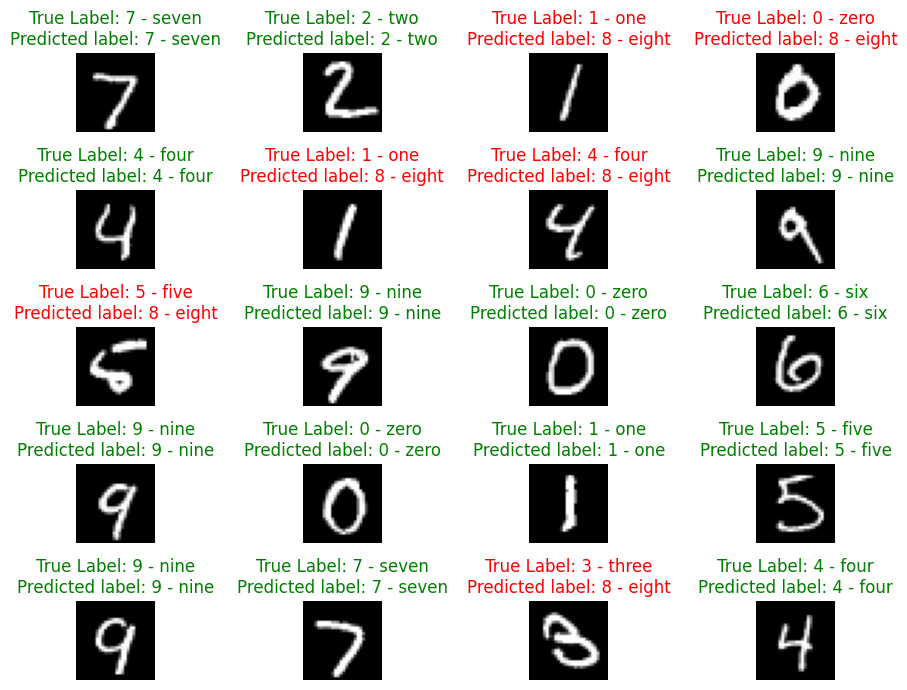

In [29]:
#Visualizing True and predicted values
plt.figure(figsize = (12, 7))
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(test_data[i][0].squeeze(), cmap = 'gray')
    plt.axis(False)
    true_label = test_data.classes[test_data[i][1]]
    pred_label = test_data.classes[model_1_pred_labels[i]]
    if true_label == pred_label:
        plt.title(f'True Label: {test_data.classes[test_data[i][1]]}\nPredicted label: {test_data.classes[model_1_pred_labels[i]]}', c = 'g')
    else:
        plt.title(f'True Label: {test_data.classes[test_data[i][1]]}\nPredicted label: {test_data.classes[model_1_pred_labels[i]]}', c = 'r')
    plt.tight_layout()

In [30]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

In [31]:
Confmat = ConfusionMatrix(num_classes = len(test_data.classes), task = 'multiclass')
Confmat_tensor = Confmat(preds = model_1_pred_labels.to('cpu'), target = test_data.targets.to('cpu'))

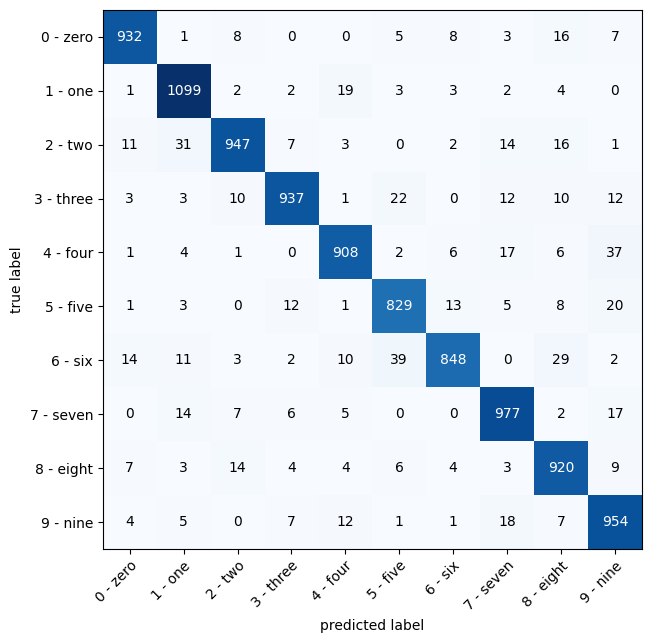

In [32]:
fig, ax = plot_confusion_matrix(Confmat_tensor.numpy(), figsize = (10, 7), class_names = test_data.classes)

**Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?**

In [33]:
random_tensor_2 = torch.randn(1, 3, 64, 64)

In [34]:
random_tensor_2.shape

torch.Size([1, 3, 64, 64])

In [35]:
#Starting with Kernel_size (3, 3)
conv2d_1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1, stride = 1)
print(f'Original Tensor: {random_tensor_2} | Original Tensor Shape: {random_tensor_2.shape} | Modified Tensor: {conv2d_1(random_tensor_2)} | Modified Tensor shape: {conv2d_1(random_tensor_2).shape}')

Original Tensor: tensor([[[[-1.8782e+00, -1.3729e-01, -3.8318e-01,  ...,  5.4904e-01,
            5.8882e-01,  1.1441e+00],
          [-2.0469e+00,  1.2613e+00,  6.2153e-01,  ..., -2.0913e+00,
           -3.3371e-01,  9.0503e-01],
          [-3.9404e-01, -3.7021e-01, -1.3903e+00,  ...,  9.5296e-01,
           -7.2700e-01,  3.4144e-01],
          ...,
          [-3.0611e-01,  8.0413e-01,  1.2937e-01,  ..., -5.6855e-01,
            2.7918e-01,  4.9995e-02],
          [-8.9089e-01, -1.5621e-01, -8.3653e-02,  ..., -2.4710e-01,
            1.5283e+00,  4.6048e-01],
          [-8.7668e-01, -4.6385e-01,  2.4098e+00,  ..., -1.6937e+00,
           -1.9319e-01,  1.2350e+00]],

         [[ 2.1754e+00,  5.8150e-01, -3.9991e-01,  ..., -1.5716e-01,
           -8.7382e-02,  6.1403e-01],
          [-3.5812e-01,  1.8285e+00, -1.3818e+00,  ..., -4.6554e-01,
           -1.6538e+00, -4.9564e-01],
          [ 2.0625e+00,  5.1909e-01,  2.3887e-01,  ..., -9.1076e-02,
           -1.7650e+00, -2.4509e-01],
   

In [36]:
 #Starting with Kernel_size (5, 5)
conv2d_1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 5, padding = 1, stride = 1)
print(f'Original Tensor: {random_tensor_2} | Original Tensor Shape: {random_tensor_2.shape} | Modified Tensor: {conv2d_1(random_tensor_2)} | Modified Tensor shape: {conv2d_1(random_tensor_2).shape}')

Original Tensor: tensor([[[[-1.8782e+00, -1.3729e-01, -3.8318e-01,  ...,  5.4904e-01,
            5.8882e-01,  1.1441e+00],
          [-2.0469e+00,  1.2613e+00,  6.2153e-01,  ..., -2.0913e+00,
           -3.3371e-01,  9.0503e-01],
          [-3.9404e-01, -3.7021e-01, -1.3903e+00,  ...,  9.5296e-01,
           -7.2700e-01,  3.4144e-01],
          ...,
          [-3.0611e-01,  8.0413e-01,  1.2937e-01,  ..., -5.6855e-01,
            2.7918e-01,  4.9995e-02],
          [-8.9089e-01, -1.5621e-01, -8.3653e-02,  ..., -2.4710e-01,
            1.5283e+00,  4.6048e-01],
          [-8.7668e-01, -4.6385e-01,  2.4098e+00,  ..., -1.6937e+00,
           -1.9319e-01,  1.2350e+00]],

         [[ 2.1754e+00,  5.8150e-01, -3.9991e-01,  ..., -1.5716e-01,
           -8.7382e-02,  6.1403e-01],
          [-3.5812e-01,  1.8285e+00, -1.3818e+00,  ..., -4.6554e-01,
           -1.6538e+00, -4.9564e-01],
          [ 2.0625e+00,  5.1909e-01,  2.3887e-01,  ..., -9.1076e-02,
           -1.7650e+00, -2.4509e-01],
   

**Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.
Then plot some predictions where the model was wrong alongside what the label of the image should've been.
After visualing these predictions do you think it's more of a modelling error or a data error?
As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?**

In [37]:
from torchvision.datasets import FashionMNIST
train_data_2 = FashionMNIST(root = 'data', train = True, download = True, transform = ToTensor(), target_transform = None)
test_data_2 = FashionMNIST(root = 'data', train = False, download = True, transform = ToTensor(), target_transform = None)
train_dataloader_2 = DataLoader(dataset = train_data_2, batch_size = 32, shuffle = True)
test_dataloader_2 = DataLoader(dataset = test_data_2, batch_size = 32, shuffle = False)

In [38]:
class FashionMNISTPro(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units:int):
        super().__init__()
        self.conv_1 = nn.Sequential(nn.Conv2d(in_channels = 1, out_channels = hidden_units, kernel_size = 3, padding = 1, stride = 1), nn.ReLU())
        self.conv_2 = nn.Sequential(nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, padding = 1, stride = 1), nn.ReLU())
        self.conv_3 = nn.Sequential(nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, padding = 1, stride = 1), nn.ReLU(), nn.MaxPool2d(kernel_size = 2, stride = 1))
        self.fc_1 = nn.Sequential(nn.Flatten(), nn.Linear(in_features = hidden_units * 27 * 27 , out_features = hidden_units), nn.ReLU())
        self.classifier = nn.Linear(in_features = hidden_units, out_features = output_shape)
    def forward(self, x):
        x = self.conv_1(x)
        #print(f'Shape: {x.shape}')
        x = self.conv_2(x)
        #print(f'Shape: {x.shape}')
        x = self.conv_3(x)
        #print(f'Shape: {x.shape}')
        x = self.fc_1(x)
        #print(f'Shape: {x.shape}')
        x = self.classifier(x)
        return x

In [39]:
model_2 = FashionMNISTPro(1, len(train_data_2.classes), hidden_units = 64).to(device)

In [40]:
model_2

FashionMNISTPro(
  (conv_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv_3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=46656, out_features=64, bias=True)
    (2): ReLU()
  )
  (classifier): Linear(in_features=64, out_features=10, bias=True)
)

In [41]:
model_2.state_dict()

OrderedDict([('conv_1.0.weight',
              tensor([[[[ 0.0289, -0.1451, -0.3226],
                        [-0.2639,  0.0962,  0.0747],
                        [-0.2542,  0.2186,  0.3050]]],
              
              
                      [[[ 0.2002,  0.2732,  0.3125],
                        [ 0.2767, -0.2116,  0.2860],
                        [-0.3318,  0.0892,  0.0622]]],
              
              
                      [[[-0.0693, -0.0259, -0.1287],
                        [-0.0520, -0.2916, -0.2503],
                        [ 0.1177,  0.2898, -0.1205]]],
              
              
                      [[[ 0.0109,  0.1176,  0.2480],
                        [ 0.3310, -0.1518, -0.2891],
                        [ 0.2804,  0.1218, -0.2306]]],
              
              
                      [[[-0.2130, -0.1822,  0.3062],
                        [-0.2904,  0.1501,  0.3231],
                        [-0.1182, -0.1690,  0.0794]]],
              
              
            

In [42]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [43]:
dummy_tensor = torch.randn(1, 28, 28).to(device)
model_2(dummy_tensor.unsqueeze(dim = 0))

tensor([[-0.1620, -0.0280, -0.0242, -0.1373,  0.0142,  0.0828, -0.0227,  0.0821,
         -0.0371, -0.0038]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [44]:
opt_fn_2 = torch.optim.Adam(params = model_2.parameters(), lr = 0.001)
loss_fn_2 = nn.CrossEntropyLoss()

In [45]:
#Training and test loops for the model
for i in range(10):
    from timeit import default_timer as timer
epochs = 10
start = timer()
for epoch in range(epochs):
    print(f'----------Epoch : {epoch + 1}----------')
    train_step(model_2, train_dataloader_2, opt_fn_2, loss_fn_2, accuracy_fn, device)
    test_step(model_2, test_dataloader_2, loss_fn_2, accuracy_fn, device)
end = timer()
print(f'Total Time: {end - start} s on {device}')

----------Epoch : 1----------
Train Loss: 0.3643 | Train Acc: 77.3617 % 
Test Loss: 0.2894 | Test Acc: 79.8822 % 
----------Epoch : 2----------
Train Loss: 0.2173 | Train Acc: 80.8000 % 
Test Loss: 0.2422 | Test Acc: 81.8391 % 
----------Epoch : 3----------
Train Loss: 0.1686 | Train Acc: 81.7950 % 
Test Loss: 0.2233 | Test Acc: 79.7724 % 
----------Epoch : 4----------
Train Loss: 0.1288 | Train Acc: 82.2567 % 
Test Loss: 0.2386 | Test Acc: 79.9321 % 
----------Epoch : 5----------
Train Loss: 0.0931 | Train Acc: 82.1133 % 
Test Loss: 0.2479 | Test Acc: 77.8754 % 
----------Epoch : 6----------
Train Loss: 0.0686 | Train Acc: 81.7333 % 
Test Loss: 0.3010 | Test Acc: 77.7356 % 
----------Epoch : 7----------
Train Loss: 0.0523 | Train Acc: 82.0100 % 
Test Loss: 0.3282 | Test Acc: 78.6042 % 
----------Epoch : 8----------
Train Loss: 0.0393 | Train Acc: 82.3233 % 
Test Loss: 0.3984 | Test Acc: 75.2696 % 
----------Epoch : 9----------
Train Loss: 0.0334 | Train Acc: 82.1600 % 
Test Loss: 0.38

In [48]:
model_2_results = make_preds(model_2, test_dataloader_2, device)

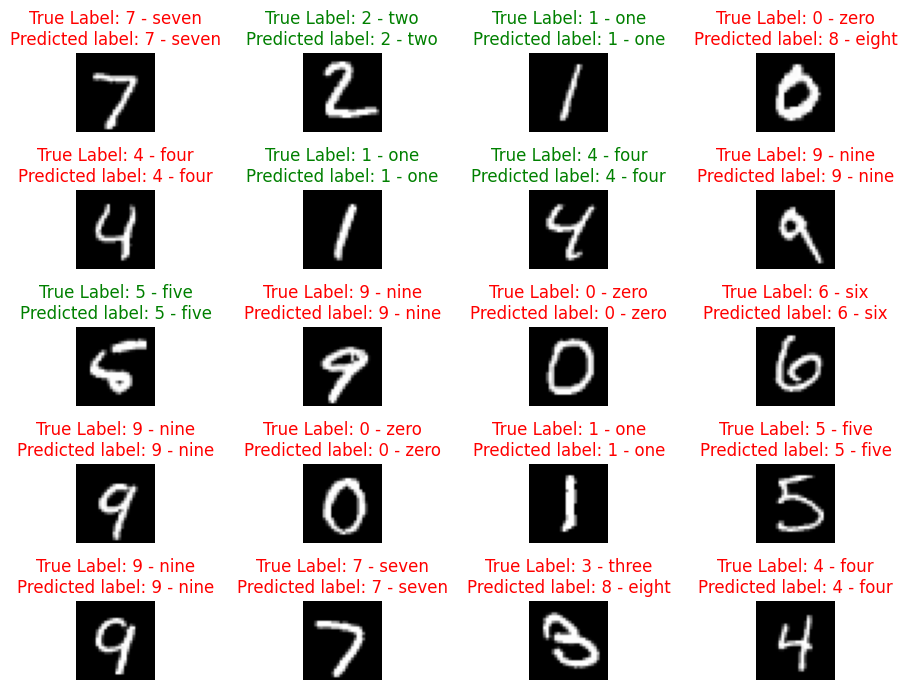

In [50]:
#Visualizing True and predicted values
plt.figure(figsize = (12, 7))
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(test_data[i][0].squeeze(), cmap = 'gray')
    plt.axis(False)
    true_label = test_data.classes[test_data[i][1]]
    pred_label = test_data.classes[model_2_results[i]]
    if true_label == pred_label:
        plt.title(f'True Label: {test_data.classes[test_data[i][1]]}\nPredicted label: {test_data.classes[model_2_results[i]]}', c = 'g')
    else:
        plt.title(f'True Label: {test_data.classes[test_data[i][1]]}\nPredicted label: {test_data.classes[model_1_pred_labels[i]]}', c = 'r')
    plt.tight_layout()

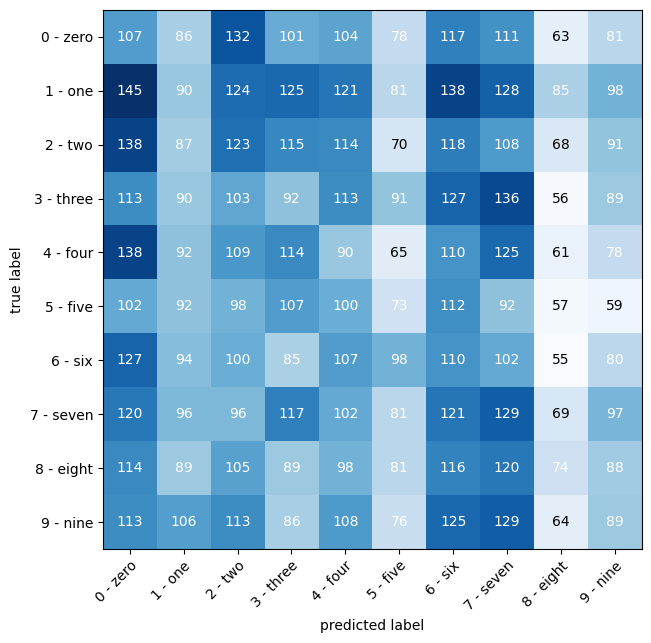

In [51]:
Confmat = ConfusionMatrix(num_classes=len(test_data.classes), task='multiclass')
Confmat_tensor = Confmat(preds=model_2_results.to('cpu'), target=test_data.targets.to('cpu'))
fig, ax = plot_confusion_matrix(Confmat_tensor.numpy(), figsize=(10, 7), class_names=test_data.classes)